In [7]:
%matplotlib widget
%matplotlib inline


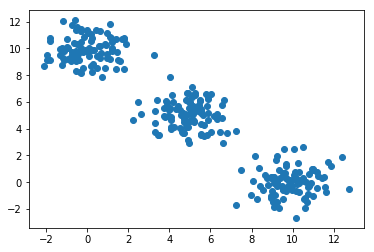

In [8]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np
import tensorflow as tf

M=2
K=3
n=100
N=n*K

X1=np.random.randn(n,M)+np.array([0,10])
X2=np.random.randn(n,M)+np.array([5,5])
X3=np.random.randn(n,M)+np.array([10,0])
Y1=np.array([[1,0,0] for i in range(n)])
Y2=np.array([[0,1,0] for i in range(n)])
Y3=np.array([[0,0,1] for i in range(n)])

X=np.concatenate((X1,X2,X3),axis=0)
Y=np.concatenate((Y1,Y2,Y3),axis=0)

px,py=X.T
plt.plot(px,py,'o')


In [9]:
W=tf.Variable(tf.zeros([M,K]))
b=tf.Variable(tf.zeros([K]))

x=tf.placeholder(tf.float32,shape=[None,M])
t=tf.placeholder(tf.float32,shape=[None,K])
y=tf.nn.softmax(tf.matmul(x,W)+b)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(t*tf.log(y),reduction_indices=[1]))

train_step=tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(t,1))

In [10]:
batch_size=50
n_batches=N
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)
for epoch in range(20):
    X_,Y_=shuffle(X,Y)
    for i in range(n_batches):
        start=i*batch_size
        end=start+batch_size
        sess.run(train_step,feed_dict={
            x:X_[start:end],
            t:Y_[start:end]
        })

classified:
[ True  True  True  True  True  True  True  True  True  True]

output probability:
[[9.6996552e-01 3.0034527e-02 2.6986143e-08]
 [8.1137400e-03 9.8696250e-01 4.9237013e-03]
 [9.9428731e-01 5.7127150e-03 1.4357406e-09]
 [5.2903754e-01 4.7095773e-01 4.6997839e-06]
 [2.3239443e-02 9.7453755e-01 2.2230335e-03]
 [6.3373790e-08 1.9031789e-02 9.8096818e-01]
 [4.2109902e-09 5.1022526e-03 9.9489778e-01]
 [1.3094454e-02 9.8149937e-01 5.4061338e-03]
 [9.4991994e-01 5.0079811e-02 2.6461265e-07]
 [6.1578350e-04 8.8100529e-01 1.1837903e-01]]
0.2953474 -1.0954592 0.28732896 0.79314536
0.8001123 0.2953474 -1.0804745 0.28732896


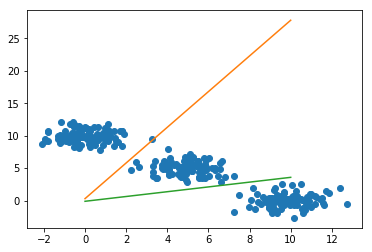

In [11]:
X_, Y_ = shuffle(X, Y)

classified = correct_prediction.eval(session=sess, feed_dict={
    x: X_[0:10],
    t: Y_[0:10]
})
prob = y.eval(session=sess, feed_dict={
    x: X_[0:10]
})

print('classified:')
print(classified)
print()
print('output probability:')
print(prob)

WW=sess.run(W)
bb=sess.run(b)
xx=np.linspace(0,10,100)

plt.plot(px,py,'o')

for i in range(2):
    print(WW[0][i+1],WW[0][i],WW[1][i+1],WW[1][i])
    plt.plot( xx, 
             ( xx * ( WW[0][i+1] - WW[0][i] ) + ( bb[i+1] - bb[i] ) ) 
             / 
             ( WW[1][i] - WW[1][i+1] ) 
            )
plt.show()